# Language Analysis: Iran
Analyzing the language of **accounts and tweets** identified by Twitter to be associated with the country's information operations.

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import langdetect
from collections import Counter
import iso639 as pylang
import seaborn as sns

twitter_color = (0.114, 0.631, 0.949, 1.0)

---
## Tweet Language Summary

In [2]:
filename_one = '../Data/iranian_tweets_csv_hashed.csv'
filename_two = '../Data/iran_201901_1_tweets_csv_hashed.csv'

#### Import dataset 1

In [3]:
iran_one = pd.read_csv(filename_one, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

#### Import dataset 2

In [4]:
iran_two = pd.read_csv(filename_two, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

#### Combine datasets

In [9]:
iran_datasets = [iran_one, iran_two]
iran = pd.concat(iran_datasets, sort=False)

#### Print number of tweets

In [10]:
print(len(iran))

5569992


#### Print features that we can access

In [11]:
iran.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

#### Sample data of tweets & their detected language

In [60]:
for elem in iran.head(5)['tweet_text']:
    print(elem)
    print(langdetect.detect(elem))
    print()

@bellisarobz Ces photos illustrent parfaitement ce que ressentent les pères à un concert de One Direction http://t.co/YGdg8ihIh7
fr

@ParkerLampe An inquiry by congress confirms that ISIS is indeed a CIA creation http://t.co/eFRmFwYZTV
en

@hadeelhmaidi @wordpressdotcom CIA predict third terrorist attack after Sidney and Pakiistan in USA in 3 days http://t.co/IrPx7M223N
en

@MartinYannis l'avis bizarre de marcel tonton sur booba http://t.co/iFojzaCe4K
fr

@courrierinter Les laboratoires US de guerre biologique à l’origine de l’épidémie d’Ebola http://t.co/Kg1VuP4ixb
fr



#### Detect language of tweets & store in a list
Only do first 10,000 tweets for Milestone 1

In [78]:
tweet_languages = []
num_of_tweets = 10000
iran_tweets = iran.head(num_of_tweets)['tweet_text']

for tweet_text in iran_tweets:
    lang = ''
    try:
        lang = langdetect.detect(tweet_text)
    except:
        lang = 'n/a'
    tweet_languages.append(lang)

#### Get counts of each language

In [79]:
tweet_languages_count = Counter(tweet_languages)
print(tweet_languages_count)

Counter({'en': 2879, 'fr': 2424, 'ar': 1455, 'fa': 892, 'tr': 860, 'es': 521, 'ru': 324, 'ca': 84, 'n/a': 74, 'id': 65, 'de': 61, 'so': 61, 'ur': 52, 'hi': 42, 'it': 35, 'pt': 18, 'tl': 17, 'af': 15, 'ro': 15, 'cy': 14, 'nl': 14, 'et': 12, 'sw': 12, 'hr': 8, 'sl': 7, 'no': 7, 'sv': 4, 'lv': 4, 'hu': 3, 'sq': 3, 'fi': 3, 'da': 3, 'lt': 3, 'bg': 3, 'pl': 2, 'sk': 2, 'el': 1, 'vi': 1})


#### Plot language counts

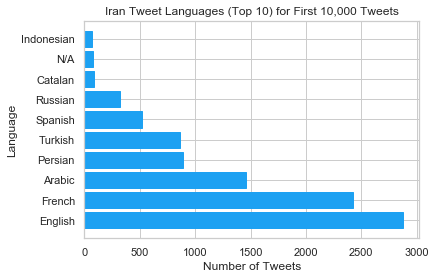

In [190]:
tweet_lang_types = []
tweet_lang_counts = []
sorted_tweet_languages_count = tweet_languages_count.most_common(10)

for lang, count in sorted_tweet_languages_count:
    tweet_lang_types.append(lang)
    tweet_lang_counts.append(count)

tweet_lang_types_long = []
for lang in tweet_lang_types:
    try:
        lang_long = pylang.languages.get(alpha2 = lang).name
        tweet_lang_types_long.append(lang_long)
    except:
        # For type n/a, will throw an error
        tweet_lang_types_long.append('N/A')

# Labels
plt.title('Iran Tweet Languages (Top 10) for First 10,000 Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Language')

# Add Data
y_pos = np.arange(len(tweet_lang_types_long))
sns.set_style('whitegrid')
plt.barh(y_pos, tweet_lang_counts, color = twitter_color, edgecolor = twitter_color)
plt.yticks(y_pos, tweet_lang_types_long)

plt.show()

---
## Account Language Summary
#### Import datasets

In [171]:
accounts_filename_one = '../Data/iranian_users_csv_hashed.csv'
accounts_filename_two = '../Data/iran_201901_1_users_csv_hashed.csv'

# Import datasets
iran_accounts_one = pd.read_csv(accounts_filename_one, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})
iran_accounts_two = pd.read_csv(accounts_filename_two, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})

#### Combine datasets / Print number of users

In [20]:
iran_account_datasets = [iran_accounts_one, iran_accounts_two]
iran_users = pd.concat(iran_account_datasets, sort=False)
print(len(iran_users))

3081


#### Print available features

In [21]:
iran_users.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

#### Sample data of account languages

In [22]:
for elem in iran_users.head(5)['account_language']:
    print(elem)

en
en
en-gb
en
en


#### Get counts of each language

In [37]:
languages_count = Counter(iran_users['account_language'])
print(languages_count)

Counter({'en': 2773, 'ar': 118, 'fa': 80, 'id': 52, 'en-gb': 30, 'es': 11, 'tr': 11, 'fr': 3, 'ru': 1, 'el': 1, 'de': 1})


#### Plot language counts

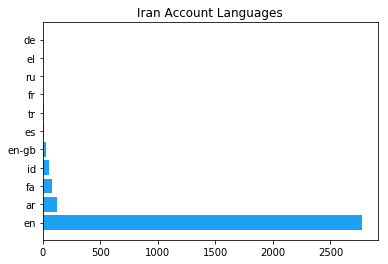

In [101]:
lang_types = []
lang_counts = []
sorted_languages_count = languages_count.most_common()
for lang, count in sorted_languages_count:
    lang_types.append(lang)
    lang_counts.append(count)

# lang_types_long = []
# for lang in lang_types:
#     lang_long = pylang.languages.get(alpha2 = lang).name
#     lang_types_long.append(lang_long)

pyplot.title('Iran Account Languages')
# y_pos = np.arange(len(lang_types_long))
y_pos = np.arange(len(lang_types))
pyplot.barh(y_pos, lang_counts, color = twitter_color)
# pyplot.yticks(y_pos, lang_types_long)
pyplot.yticks(y_pos, lang_types)
pyplot.show()




lang_types = []
lang_counts = []
sorted_languages_count = languages_count.most_common(10)

for lang, count in sorted_languages_count:
    lang_types.append(lang)
    lang_counts.append(count)

lang_types_long = []
for lang in lang_types:
    try:
        lang_long = pylang.languages.get(alpha2 = lang).name
        lang_types_long.append(lang_long)
    except:
        # For type n/a, will throw an error
        lang_types_long.append('N/A')

# Labels
plt.title('Iran Account Languages')
plt.xlabel('Number of Accounts')
plt.ylabel('Language')

# Add Data
y_pos = np.arange(len(lang_types_long))
sns.set_style('whitegrid')
plt.barh(y_pos, lang_counts, color = twitter_color, edgecolor = twitter_color)
plt.yticks(y_pos, lang_types_long)

plt.show()